# COVID-19 Data Analysis
by: Kanwar Hamza Shuja\
Date: 26/04/2025\
email: kanwarhamzashuj@gmail.com

# Step-1 EDA

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import plotly.express as px

# other
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# read dataset

covid_excel = pd.ExcelFile(
    r"C:\Users\user\Downloads\archive\covid_testing.xlsx"
)  # Note: different variable name
all_sheets = {sheet: covid_excel.parse(sheet) for sheet in covid_excel.sheet_names}

In [4]:
# since there are multiple sheets in the dataset we will first load all the sheets in the dataset into a single dataframe using pandas.

TimeSeries_KeyIndicators = all_sheets["TimeSeries_KeyIndicators"]
TimeSeries_KeyIndicators_Detail = all_sheets["TimeSeries_KeyIndicators_Detail"]
TimeSeries_Action_Screen = all_sheets["TimeSeries_Action_Screen"]
TimeSeries_Action_Call = all_sheets["TimeSeries_Action_Call"]
TimeSeries_COVID_News = all_sheets["TimeSeries_COVID_News"]
TimeSeries_NIH_Response = all_sheets["TimeSeries_NIH_Response"]
TimeSeries_NIH_Risk = all_sheets["TimeSeries_NIH_Risk"]
TimeSeries_Province_Response = all_sheets["TimeSeries_Province_Response"]
TimeSeries_Helpline_Calls = all_sheets["TimeSeries_Helpline_Calls"]
TimeSeries_Quarantine_Details = all_sheets["TimeSeries_Quarantine_Details"]

# Verification
print("Successfully loaded all sheets:")
for name, df in all_sheets.items():
    print(f"{name}: {df.shape}")

# Example usage
print("\nFirst 3 rows of TimeSeries_KeyIndicators:")
print(TimeSeries_KeyIndicators.head(3))

Successfully loaded all sheets:
TimeSeries_KeyIndicators: (643, 12)
TimeSeries_KeyIndicators_Detail: (315, 55)
TimeSeries_Action_Screen: (24, 4)
TimeSeries_Action_Call: (40, 7)
TimeSeries_COVID_News: (146, 4)
TimeSeries_NIH_Response: (65, 4)
TimeSeries_NIH_Risk: (24, 3)
TimeSeries_Province_Response: (166, 5)
TimeSeries_Helpline_Calls: (24, 4)
TimeSeries_Quarantine_Details: (21, 6)

First 3 rows of TimeSeries_KeyIndicators:
   Unnamed: 0  Cumulative  Cumulative  Test positive  \
0           4          48                          2   
1           5          61                          0   
2           6          84                         14   

   Cumulative  tests performed                 Date  Discharged  Expired  \
0                           80  2020-03-11 00:00:00           0        0   
1                           95  2020-03-11 00:00:00           0        0   
2                          171  2020-03-11 00:00:00           1        0   

   Home Quarantine  New  (last 24 hrs)  Reg

In [5]:
# renaming the sheets in the excel file

from openpyxl import load_workbook

# Load the Excel file
file_path = "covid_testing.xlsx"
wb = load_workbook(r"C:\Users\user\Downloads\archive\covid_testing.xlsx")

# Define new names (replace with your desired names)
new_names = {
    "TimeSeries_KeyIndicators": "KeyMetrics",
    "TimeSeries_KeyIndicators_Detail": "DetailedMetrics",
    "TimeSeries_Action_Screen": "Actions",
    "TimeSeries_Action_Call": "Calls",
    "TimeSeries_COVID_News": "News",
    "TimeSeries_NIH_Response": "NIH_Response",
    "TimeSeries_NIH_Risk": "RiskLevels",
    "TimeSeries_Province_Response": "ProvinceData",
    "TimeSeries_Helpline_Calls": "Helpline",
    "TimeSeries_Quarantine_Details": "Quarantine",
}

# Rename sheets
for old_name in new_names:
    if old_name in wb.sheetnames:
        ws = wb[old_name]
        ws.title = new_names[old_name]

# Save to a new file
wb.save("covid_testing_renamed.xlsx")  # New file

In [6]:
# reloading the new file

covid_excel = pd.ExcelFile(
    "covid_testing_renamed.xlsx"
)  # Note: different variable name
all_sheets = {sheet: covid_excel.parse(sheet) for sheet in covid_excel.sheet_names}

In [7]:
import pandas as pd

# Loading the renamed Excel file (all sheets)
covid_excel = pd.read_excel("covid_testing_renamed.xlsx", sheet_name=None)

# Access individual sheets using your new names
KeyMetrics = covid_excel["KeyMetrics"]
DetailedMetrics = covid_excel["DetailedMetrics"]
Actions = covid_excel["Actions"]
Calls = covid_excel["Calls"]
News = covid_excel["News"]
NIH_Response = covid_excel["NIH_Response"]
RiskLevels = covid_excel["RiskLevels"]
ProvinceData = covid_excel["ProvinceData"]
Helpline = covid_excel["Helpline"]
Quarantine = covid_excel["Quarantine"]

# Verify loading
print("Successfully loaded sheets:")
for sheet_name, df in covid_excel.items():
    print(f"{sheet_name}: {df.shape}")

# Example: Show first 3 rows of KeyMetrics
print("\nKeyMetrics preview:")
print(KeyMetrics.head(3))

Successfully loaded sheets:
KeyMetrics: (643, 12)
DetailedMetrics: (315, 55)
Actions: (24, 4)
Calls: (40, 7)
News: (146, 4)
NIH_Response: (65, 4)
RiskLevels: (24, 3)
ProvinceData: (166, 5)
Helpline: (24, 4)
Quarantine: (21, 6)

KeyMetrics preview:
   Unnamed: 0  Cumulative  Cumulative  Test positive  \
0           4          48                          2   
1           5          61                          0   
2           6          84                         14   

   Cumulative  tests performed                 Date  Discharged  Expired  \
0                           80  2020-03-11 00:00:00           0        0   
1                           95  2020-03-11 00:00:00           0        0   
2                          171  2020-03-11 00:00:00           1        0   

   Home Quarantine  New  (last 24 hrs)  Region  Still admitted  \
0              NaN                   3     ICT               2   
1              NaN                   6  Punjab               0   
2              NaN      

# EDA on Sheet 1

In [8]:
# now lets load the data from sheet 1

df1 = pd.read_excel("covid_testing_renamed.xlsx", sheet_name="KeyMetrics")
df1.head()

,Unnamed: 0,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
0,4,48,2,80,2020-03-11 00:00:00,0,0,NaN,3,ICT,2,8
1,5,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
2,6,84,14,171,2020-03-11 00:00:00,1,0,NaN,1,Sindh,13,55
3,7,20,0,28,2020-03-11 00:00:00,0,0,NaN,0,KP,0,2
4,8,3,0,0,2020-03-11 00:00:00,0,0,NaN,0,KPTD,0,0


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         643 non-null    int64  
 1   Cumulative                         643 non-null    int64  
 2   Cumulative  Test positive          643 non-null    int64  
 3   Cumulative  tests performed        643 non-null    int64  
 4   Date                               643 non-null    object 
 5   Discharged                         643 non-null    int64  
 6   Expired                            643 non-null    int64  
 7   Home Quarantine                    504 non-null    float64
 8   New  (last 24 hrs)                 643 non-null    int64  
 9   Region                             643 non-null    object 
 10  Still admitted                     643 non-null    int64  
 11  Tests  performed in last 24 hours  643 non-null    object 

In [10]:
df1.isnull().sum()

Unnamed: 0                             0
Cumulative                             0
Cumulative  Test positive              0
Cumulative  tests performed            0
Date                                   0
Discharged                             0
Expired                                0
Home Quarantine                      139
New  (last 24 hrs)                     0
Region                                 0
Still admitted                         0
Tests  performed in last 24 hours      0
dtype: int64

In [11]:
df1.isnull().sum() * 100 / len(df1)

Unnamed: 0                            0.000000
Cumulative                            0.000000
Cumulative  Test positive             0.000000
Cumulative  tests performed           0.000000
Date                                  0.000000
Discharged                            0.000000
Expired                               0.000000
Home Quarantine                      21.617418
New  (last 24 hrs)                    0.000000
Region                                0.000000
Still admitted                        0.000000
Tests  performed in last 24 hours     0.000000
dtype: float64

In [12]:
# removing unnamed column
df1.drop(columns="Unnamed: 0", inplace=True)
df1.head()

,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
0,48,2,80,2020-03-11 00:00:00,0,0,NaN,3,ICT,2,8
1,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
2,84,14,171,2020-03-11 00:00:00,1,0,NaN,1,Sindh,13,55
3,20,0,28,2020-03-11 00:00:00,0,0,NaN,0,KP,0,2
4,3,0,0,2020-03-11 00:00:00,0,0,NaN,0,KPTD,0,0


In [13]:
df1["Home Quarantine"].unique

<bound method Series.unique of 0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
638      294.0
639     5395.0
640    10222.0
641    34520.0
642    22324.0
Name: Home Quarantine, Length: 643, dtype: float64>

In [14]:
# first rename the column names with spaces etc. to make it easy to write and work with it
df1.rename(
    columns={
        "Home Quarantine": "quarantine",
        "Cumulative  Test positive": "cum_test_positive",  # Fixed: Double space + correct spelling
        "Cumulative  tests performed": "cum_test_performed",  # Fixed: Double space
        "New  (last 24 hrs)": "new_test_24hrs",  # Fixed: Double space
        "Still admitted": "still_admitted",
        "Tests  performed in last 24 hours": "test_24hrs",  # Fixed: Double space
    },
    inplace=True,
)

In [15]:
df1.head()

,Cumulative,cum_test_positive,cum_test_performed,Date,Discharged,Expired,quarantine,new_test_24hrs,Region,still_admitted,test_24hrs
0,48,2,80,2020-03-11 00:00:00,0,0,NaN,3,ICT,2,8
1,61,0,95,2020-03-11 00:00:00,0,0,NaN,6,Punjab,0,7
2,84,14,171,2020-03-11 00:00:00,1,0,NaN,1,Sindh,13,55
3,20,0,28,2020-03-11 00:00:00,0,0,NaN,0,KP,0,2
4,3,0,0,2020-03-11 00:00:00,0,0,NaN,0,KPTD,0,0


In [16]:
# Deal with missing values

df1.fillna({"quarantine": df1["quarantine"].mean()}, inplace=True)

In [17]:
df1.describe()

,Cumulative,cum_test_positive,cum_test_performed,Discharged,Expired,quarantine,new_test_24hrs,still_admitted
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,28049.569207,3587.626750,30525.283048,1160.814930,74.581649,2417.454365,1088.769829,472.922240
std,52406.157576,7368.132133,56453.756905,2727.293247,150.071751,4158.970368,1917.027154,1089.114841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1155.000000,86.000000,1370.500000,3.000000,1.000000,89.500000,52.000000,16.500000
50%,6224.000000,465.000000,5976.000000,140.000000,5.000000,1361.000000,240.000000,62.000000
75%,26332.000000,3207.500000,29644.500000,731.000000,48.500000,2417.454365,1137.000000,406.000000
max,325091.000000,47382.000000,327072.000000,22047.000000,890.000000,34520.000000,12362.000000,9418.000000


In [18]:
df1.isnull().sum()

Cumulative            0
cum_test_positive     0
cum_test_performed    0
Date                  0
Discharged            0
Expired               0
quarantine            0
new_test_24hrs        0
Region                0
still_admitted        0
test_24hrs            0
dtype: int64

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cumulative          643 non-null    int64  
 1   cum_test_positive   643 non-null    int64  
 2   cum_test_performed  643 non-null    int64  
 3   Date                643 non-null    object 
 4   Discharged          643 non-null    int64  
 5   Expired             643 non-null    int64  
 6   quarantine          643 non-null    float64
 7   new_test_24hrs      643 non-null    int64  
 8   Region              643 non-null    object 
 9   still_admitted      643 non-null    int64  
 10  test_24hrs          643 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 55.4+ KB


In [20]:
# merging two regions because KPTD has only 2 cases

df1["Region"] = df1["Region"].replace({"KPTD": "KP"})

In [21]:
df1["Region"].unique()

array(['ICT', 'Punjab', 'Sindh', 'KP', 'Balochistan', 'AJK', 'GB',
       'Mobile Lab'], dtype=object)

# Data Wrangling while Doing EDA

<Axes: xlabel='Cumulative', ylabel='Count'>

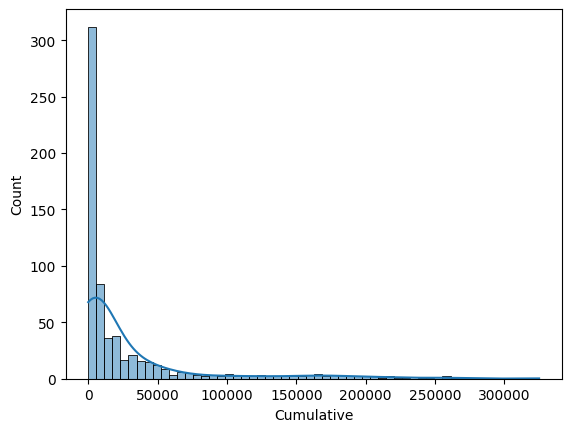

In [22]:
sns.histplot(data=df1, x="Cumulative", kde=True)

<Axes: ylabel='Cumulative'>

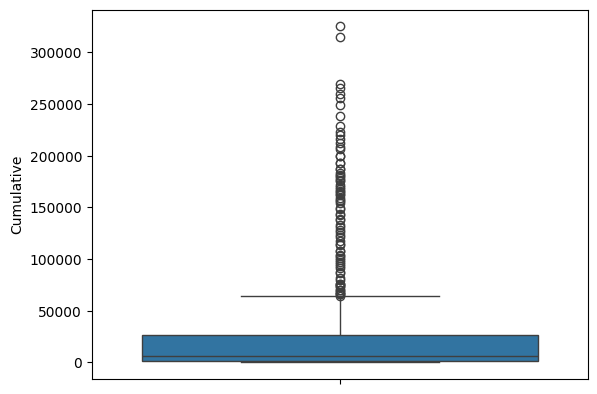

In [23]:
sns.boxplot(data=df1, y="Cumulative")

In [24]:
# First, let's just cut the outliers from the data
df1 = df1[(df1["Cumulative"] > 0) & (df1["Cumulative"] < 14000)]

In [25]:
# now lets use quartile function to remove any remaining residual outliers

Q1 = df1["Cumulative"].quantile(0.25)
Q3 = df1["Cumulative"].quantile(0.75)
IQR = Q3 - Q1

df1 = df1[
    ~((df1["Cumulative"] < (Q1 - 1.5 * IQR)) | (df1["Cumulative"] > (Q3 + 1.5 * IQR)))
]
print(df1["Cumulative"].describe())

count      411.000000
mean      3434.248175
std       3612.221847
min          3.000000
25%        232.000000
50%       2054.000000
75%       5698.000000
max      13880.000000
Name: Cumulative, dtype: float64


<Axes: ylabel='Cumulative'>

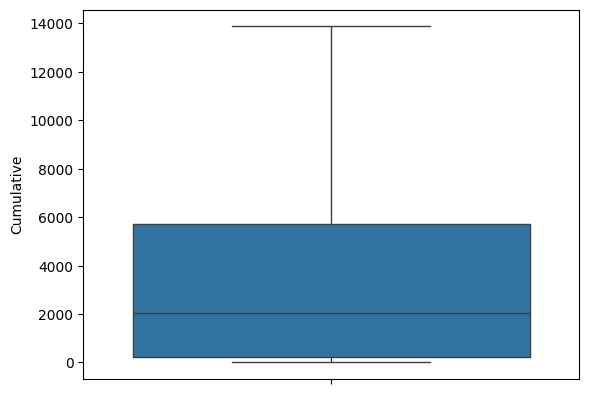

In [26]:
sns.boxplot(data=df1, y="Cumulative")  # outliers removed

In [27]:
df1.info()

# findings suggests that removing outliers aggressively is removing a lot of cases so we are not going for cutting again

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 0 to 638
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cumulative          411 non-null    int64  
 1   cum_test_positive   411 non-null    int64  
 2   cum_test_performed  411 non-null    int64  
 3   Date                411 non-null    object 
 4   Discharged          411 non-null    int64  
 5   Expired             411 non-null    int64  
 6   quarantine          411 non-null    float64
 7   new_test_24hrs      411 non-null    int64  
 8   Region              411 non-null    object 
 9   still_admitted      411 non-null    int64  
 10  test_24hrs          411 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 38.5+ KB


<Axes: xlabel='cum_test_positive', ylabel='Count'>

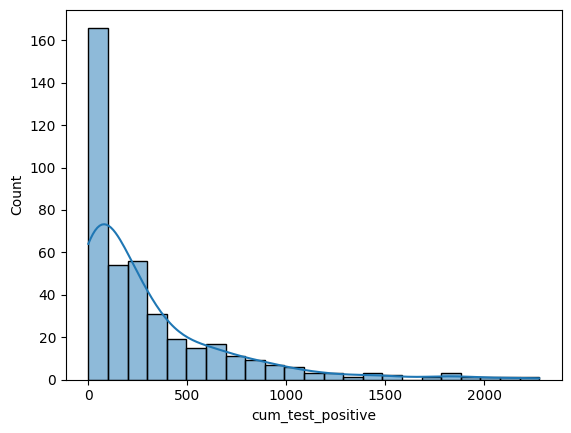

In [28]:
sns.histplot(data=df1, x="cum_test_positive", kde=True)

<Axes: ylabel='cum_test_positive'>

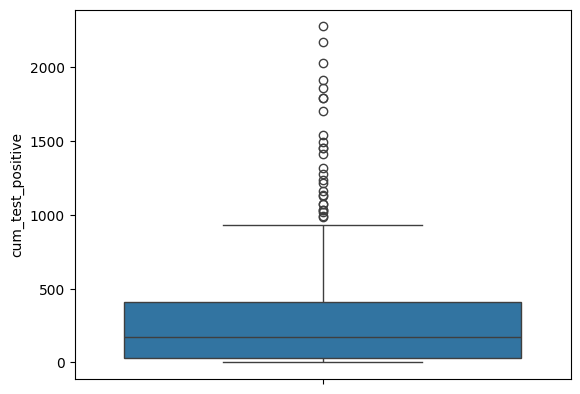

In [29]:
sns.boxplot(data=df1, y="cum_test_positive")

In [30]:
# First, let's just cut the outliers from the data
# df1 = df1[(df1["cum_test_positive"] > 0) & (df1["cum_test_positive"] < 700)]

In [31]:
# now lets use quartile function to remove any remaining residual outliers

Q1 = df1["cum_test_positive"].quantile(0.25)
Q3 = df1["cum_test_positive"].quantile(0.75)
IQR = Q3 - Q1

df1 = df1[
    ~(
        (df1["cum_test_positive"] < (Q1 - 1.5 * IQR))
        | (df1["cum_test_positive"] > (Q3 + 1.5 * IQR))
    )
]
print(df1["cum_test_positive"].describe())

count    384.000000
mean     221.671875
std      240.199790
min        0.000000
25%       23.000000
50%      144.500000
75%      330.250000
max      932.000000
Name: cum_test_positive, dtype: float64


<Axes: ylabel='cum_test_positive'>

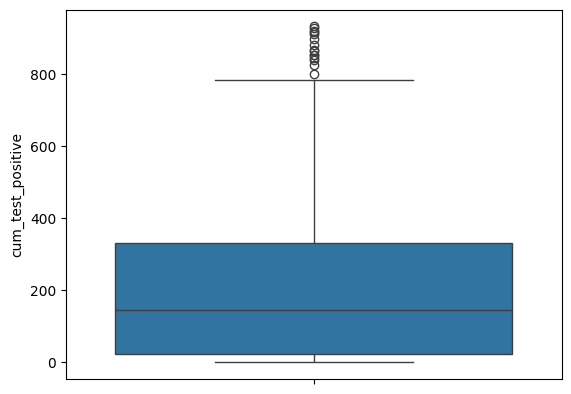

In [32]:
sns.boxplot(data=df1, y="cum_test_positive")

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 0 to 636
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cumulative          384 non-null    int64  
 1   cum_test_positive   384 non-null    int64  
 2   cum_test_performed  384 non-null    int64  
 3   Date                384 non-null    object 
 4   Discharged          384 non-null    int64  
 5   Expired             384 non-null    int64  
 6   quarantine          384 non-null    float64
 7   new_test_24hrs      384 non-null    int64  
 8   Region              384 non-null    object 
 9   still_admitted      384 non-null    int64  
 10  test_24hrs          384 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 36.0+ KB


<Axes: xlabel='cum_test_performed', ylabel='Count'>

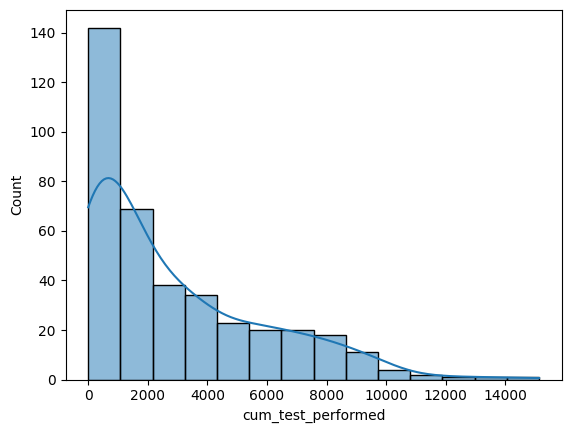

In [34]:
sns.histplot(data=df1, x="cum_test_performed", kde=True)

<Axes: ylabel='cum_test_performed'>

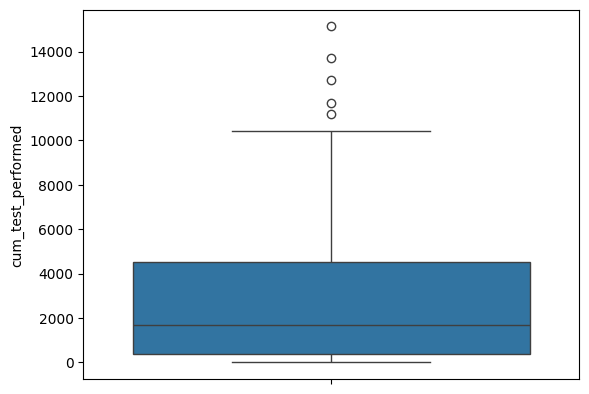

In [35]:
sns.boxplot(data=df1, y="cum_test_performed")

In [36]:
# First, let's just cut the outliers from the data
# df1 = df1[(df1["cum_test_performed"] > 0) & (df1["cum_test_performed"] < 9000)]

In [37]:
# now lets use quartile function to remove any remaining residual outliers

Q1 = df1["cum_test_performed"].quantile(0.25)
Q3 = df1["cum_test_performed"].quantile(0.75)
IQR = Q3 - Q1

df1 = df1[
    ~(
        (df1["cum_test_performed"] < (Q1 - 1.5 * IQR))
        | (df1["cum_test_performed"] > (Q3 + 1.5 * IQR))
    )
]
print(df1["cum_test_performed"].describe())

count      379.000000
mean      2734.490765
std       2758.437295
min          0.000000
25%        365.000000
50%       1657.000000
75%       4433.000000
max      10435.000000
Name: cum_test_performed, dtype: float64


<Axes: ylabel='cum_test_performed'>

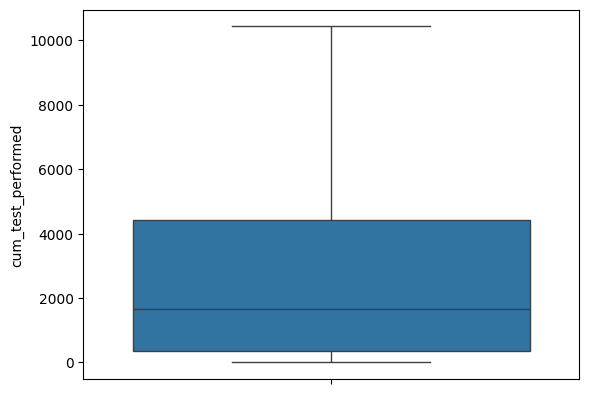

In [38]:
sns.boxplot(data=df1, y="cum_test_performed")

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379 entries, 0 to 636
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cumulative          379 non-null    int64  
 1   cum_test_positive   379 non-null    int64  
 2   cum_test_performed  379 non-null    int64  
 3   Date                379 non-null    object 
 4   Discharged          379 non-null    int64  
 5   Expired             379 non-null    int64  
 6   quarantine          379 non-null    float64
 7   new_test_24hrs      379 non-null    int64  
 8   Region              379 non-null    object 
 9   still_admitted      379 non-null    int64  
 10  test_24hrs          379 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 35.5+ KB


<Axes: xlabel='Discharged', ylabel='Count'>

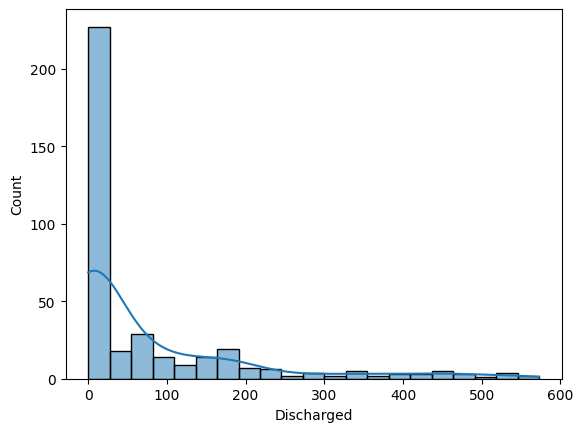

In [40]:
sns.histplot(data=df1, x="Discharged", kde=True)

<Axes: ylabel='Discharged'>

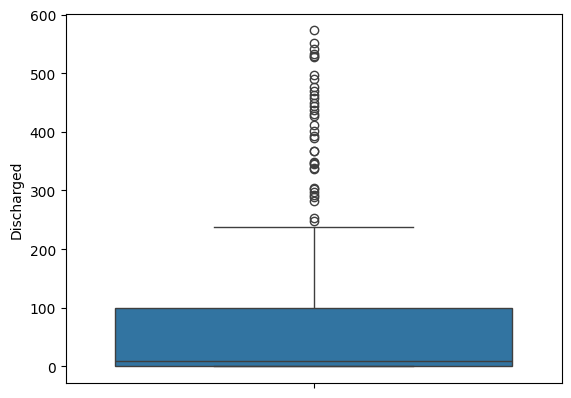

In [41]:
sns.boxplot(data=df1, y="Discharged")

In [42]:
# First, let's just cut the outliers from the data
# df1 = df1[(df1["Discharged"] > 0) & (df1["Discharged"] < 250)]

In [43]:
# now lets use quartile function to remove any remaining residual outliers

# Q1 = df1["Discharged"].quantile(0.25)
# Q3 = df1["Discharged"].quantile(0.75)
# IQR = Q3 - Q1

# df1 = df1[
#    ~((df1["Discharged"] < (Q1 - 1.5 * IQR)) | (df1["Discharged"] > (Q3 + 1.5 * IQR)))
# ]
# print(df1["Discharged"].describe())

<Axes: ylabel='Discharged'>

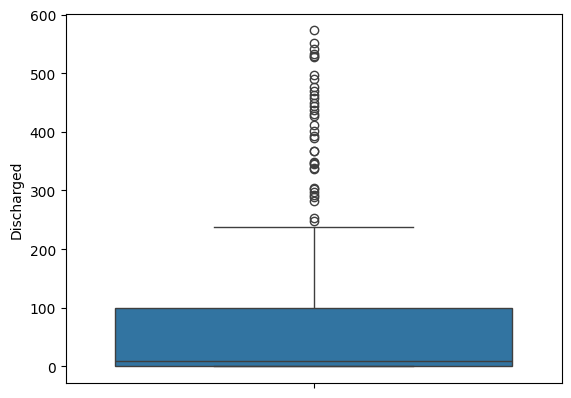

In [44]:
sns.boxplot(data=df1, y="Discharged")

<Axes: xlabel='Expired', ylabel='Count'>

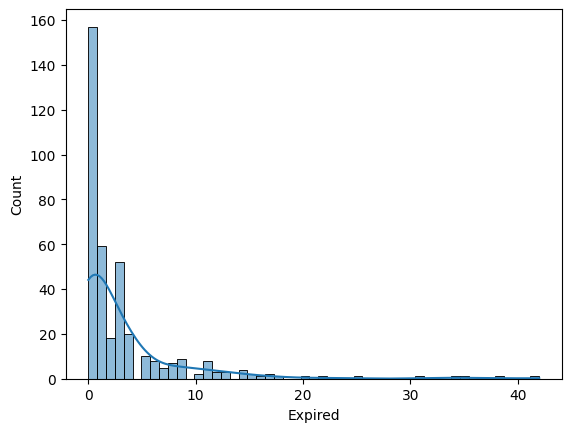

In [45]:
sns.histplot(data=df1, x="Expired", kde=True)

<Axes: ylabel='Expired'>

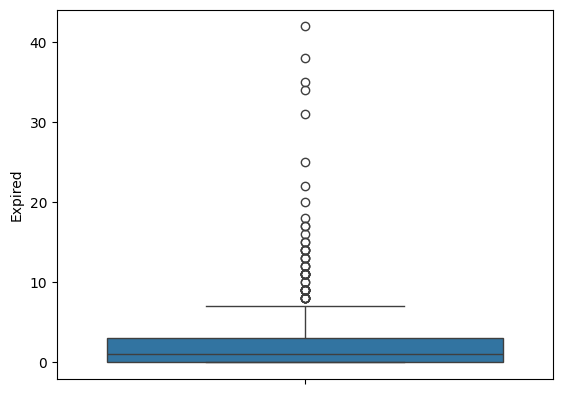

In [46]:
sns.boxplot(data=df1, y="Expired")

In [47]:
# First, let's just cut the outliers from the data
# df1 = df1[(df1["Expired"] > 0) & (df1["Expired"] < 7)]

In [48]:
# now lets use quartile function to remove any remaining residual outliers

# Q1 = df1["Expired"].quantile(0.25)
# Q3 = df1["Expired"].quantile(0.75)
# IQR = Q3 - Q1

# df1 = df1[~((df1["Expired"] < (Q1 - 1.5 * IQR)) | (df1["Expired"] > (Q3 + 1.5 * IQR)))]
# print(df1["Expired"].describe())

<Axes: ylabel='Expired'>

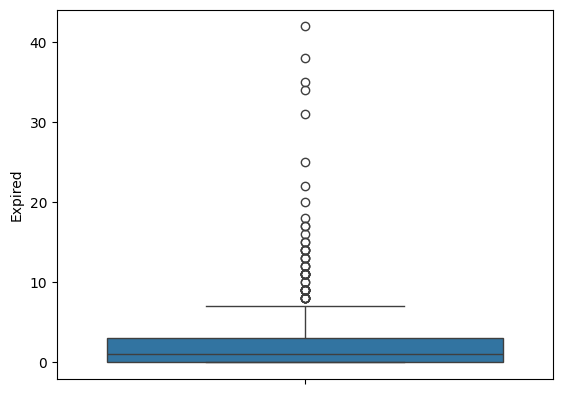

In [49]:
sns.boxplot(data=df1, y="Expired")

<Axes: xlabel='quarantine', ylabel='Count'>

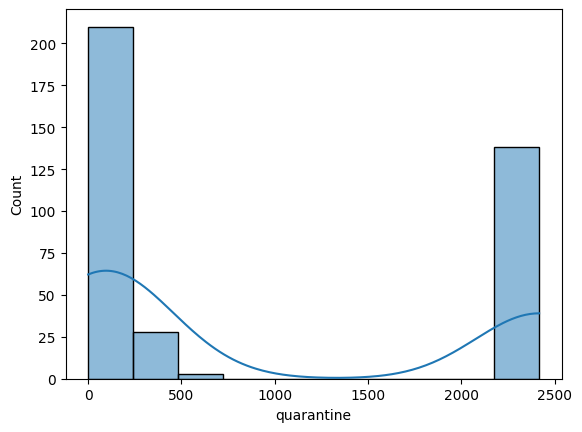

In [50]:
sns.histplot(data=df1, x="quarantine", kde=True)

<Axes: ylabel='quarantine'>

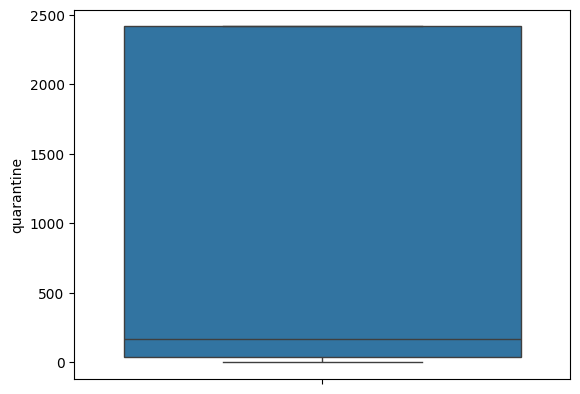

In [51]:
sns.boxplot(data=df1, y="quarantine")

In [52]:
# First, let's just cut the outliers from the data
# df1 = df1[(df1["quarantine"] > 0) & (df1["quarantine"] < 500)]

In [53]:
# now lets use quartile function to remove any remaining residual outliers

# Q1 = df1["quarantine"].quantile(0.25)
# Q3 = df1["quarantine"].quantile(0.75)
# IQR = Q3 - Q1

# df1 = df1[
#    ~((df1["quarantine"] < (Q1 - 1.5 * IQR)) | (df1["quarantine"] > (Q3 + 1.5 * IQR)))
# ]
# print(df1["quarantine"].describe())

<Axes: xlabel='new_test_24hrs', ylabel='Count'>

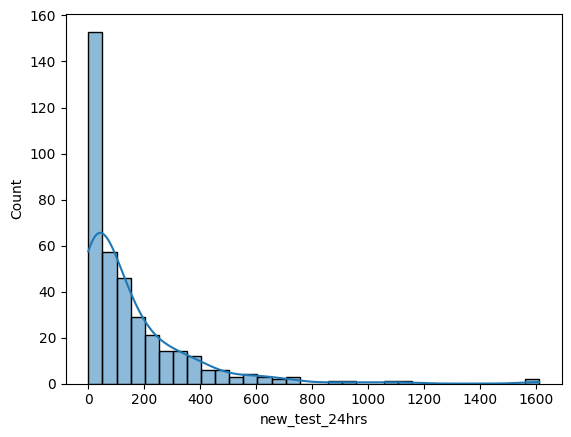

In [54]:
sns.histplot(data=df1, x="new_test_24hrs", kde=True)

<Axes: ylabel='new_test_24hrs'>

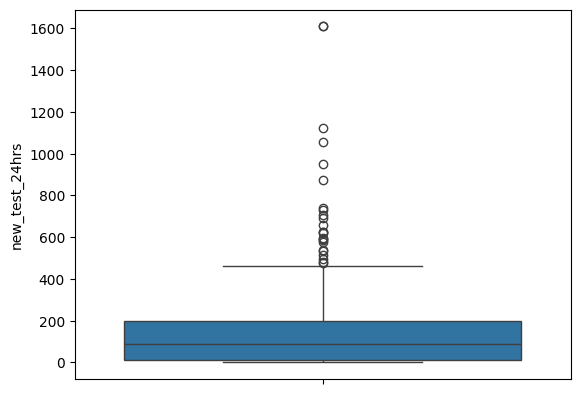

In [55]:
sns.boxplot(data=df1, y="new_test_24hrs")

In [56]:
# First, let's just cut the outliers from the data
# df1 = df1[(df1["new_test_24hrs"] > 0) & (df1["new_test_24hrs"] < 250)]

In [57]:
# now lets use quartile function to remove any remaining residual outliers

# Q1 = df1["new_test_24hrs"].quantile(0.25)
# Q3 = df1["new_test_24hrs"].quantile(0.75)
# IQR = Q3 - Q1

# df1 = df1[
#    ~(
#        (df1["new_test_24hrs"] < (Q1 - 1.5 * IQR))
#        | (df1["new_test_24hrs"] > (Q3 + 1.5 * IQR))
#    )
# ]
# print(df1["new_test_24hrs"].describe())

<Axes: xlabel='still_admitted', ylabel='Count'>

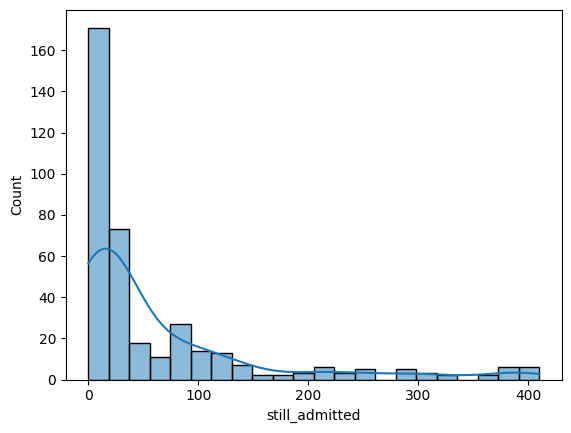

In [58]:
sns.histplot(data=df1, x="still_admitted", kde=True)

<Axes: ylabel='still_admitted'>

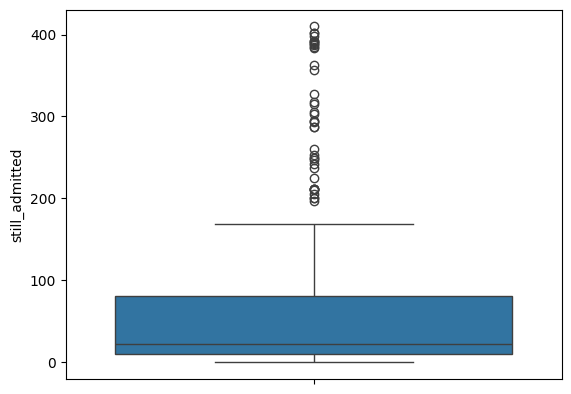

In [59]:
sns.boxplot(data=df1, y="still_admitted")

In [60]:
# First, let's just cut the outliers from the data
# df1 = df1[(df1["still_admitted"] > 0) & (df1["still_admitted"] < 175)]

In [61]:
# Q1 = df1["still_admitted"].quantile(0.25)
# Q3 = df1["still_admitted"].quantile(0.75)
# IQR = Q3 - Q1

# df1 = df1[
#    ~(
#        (df1["still_admitted"] < (Q1 - 1.5 * IQR))
#        | (df1["still_admitted"] > (Q3 + 1.5 * IQR))
#    )
# ]
# print(df1["still_admitted"].describe())

In [62]:
df1

,Cumulative,cum_test_positive,cum_test_performed,Date,Discharged,Expired,quarantine,new_test_24hrs,Region,still_admitted,test_24hrs
0,48,2,80,2020-03-11 00:00:00,0,0,2417.454365,3,ICT,2,8
1,61,0,95,2020-03-11 00:00:00,0,0,2417.454365,6,Punjab,0,7
2,84,14,171,2020-03-11 00:00:00,1,0,2417.454365,1,Sindh,13,55
3,20,0,28,2020-03-11 00:00:00,0,0,2417.454365,0,KP,0,2
4,3,0,0,2020-03-11 00:00:00,0,0,2417.454365,0,KP,0,0
...,...,...,...,...,...,...,...,...,...,...,...
617,9874,897,9859,2020-06-06 00:00:00,551,13,287.000000,247,GB,46,424
622,8342,361,8342,2020-06-07 00:00:00,190,8,0.000000,408,AJK,163,408
624,10032,927,10058,2020-06-07 00:00:00,573,13,295.000000,158,GB,46,199
629,9573,488,9573,2020-06-11 00:00:00,219,9,0.000000,371,AJK,260,371


In [63]:
# Now lets find duplicates
df1.duplicated().sum()

0

In [64]:
# To find out the rows and columns for duplicates
df1_duplicates = df1[df1.duplicated()]
df1_duplicates.head()

# meaning all the rows are unique and no duplicates are present.

,Cumulative,cum_test_positive,cum_test_performed,Date,Discharged,Expired,quarantine,new_test_24hrs,Region,still_admitted,test_24hrs


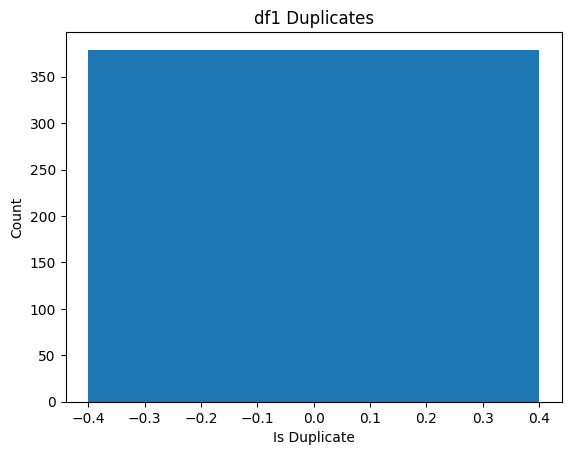

In [65]:
# we can see graphical representation of it as well

# Corrected code
df1_duplicates = (
    df1.duplicated()
)  # This creates a boolean Series indicating duplicate rows
df1_duplicates_count = df1_duplicates.value_counts()  # Count the True/False values

# Plotting the results
import matplotlib.pyplot as plt

plt.bar(df1_duplicates_count.index, df1_duplicates_count.values)
plt.title("df1 Duplicates")
plt.xlabel("Is Duplicate")
plt.ylabel("Count")
plt.show()

# again showing no duplicate cases exist

In [66]:
# Transformation

# 1. Data Normalization (To bring data in same scale) - MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379 entries, 0 to 636
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cumulative          379 non-null    int64  
 1   cum_test_positive   379 non-null    int64  
 2   cum_test_performed  379 non-null    int64  
 3   Date                379 non-null    object 
 4   Discharged          379 non-null    int64  
 5   Expired             379 non-null    int64  
 6   quarantine          379 non-null    float64
 7   new_test_24hrs      379 non-null    int64  
 8   Region              379 non-null    object 
 9   still_admitted      379 non-null    int64  
 10  test_24hrs          379 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 35.5+ KB


In [68]:
# lets normalize the data

# select the columns to normalize
cols_to_norm = [
    "Cumulative",
    "cum_test_positive",
    "cum_test_performed",
    "Discharged",
    "Expired",
    "quarantine",
    "new_test_24hrs",
    "still_admitted",
]

# creating the scaler function
scaler = StandardScaler()

# it the scaler on df1[cols_to_norm]
df1[cols_to_norm] = scaler.fit_transform(df1[cols_to_norm])
df1.head()

,Cumulative,cum_test_positive,cum_test_performed,Date,Discharged,Expired,quarantine,new_test_24hrs,Region,still_admitted,test_24hrs
0,-0.929517,-0.907374,-0.963589,2020-03-11 00:00:00,-0.603216,-0.561971,1.316536,-0.707243,ICT,-0.654276,8
1,-0.925193,-0.915776,-0.958144,2020-03-11 00:00:00,-0.603216,-0.561971,1.316536,-0.692823,Punjab,-0.675663,7
2,-0.917542,-0.856960,-0.930556,2020-03-11 00:00:00,-0.595252,-0.561971,1.316536,-0.716856,Sindh,-0.536648,55
3,-0.938831,-0.915776,-0.982465,2020-03-11 00:00:00,-0.603216,-0.561971,1.316536,-0.721662,KP,-0.675663,2
4,-0.944486,-0.915776,-0.992629,2020-03-11 00:00:00,-0.603216,-0.561971,1.316536,-0.721662,KP,-0.675663,0


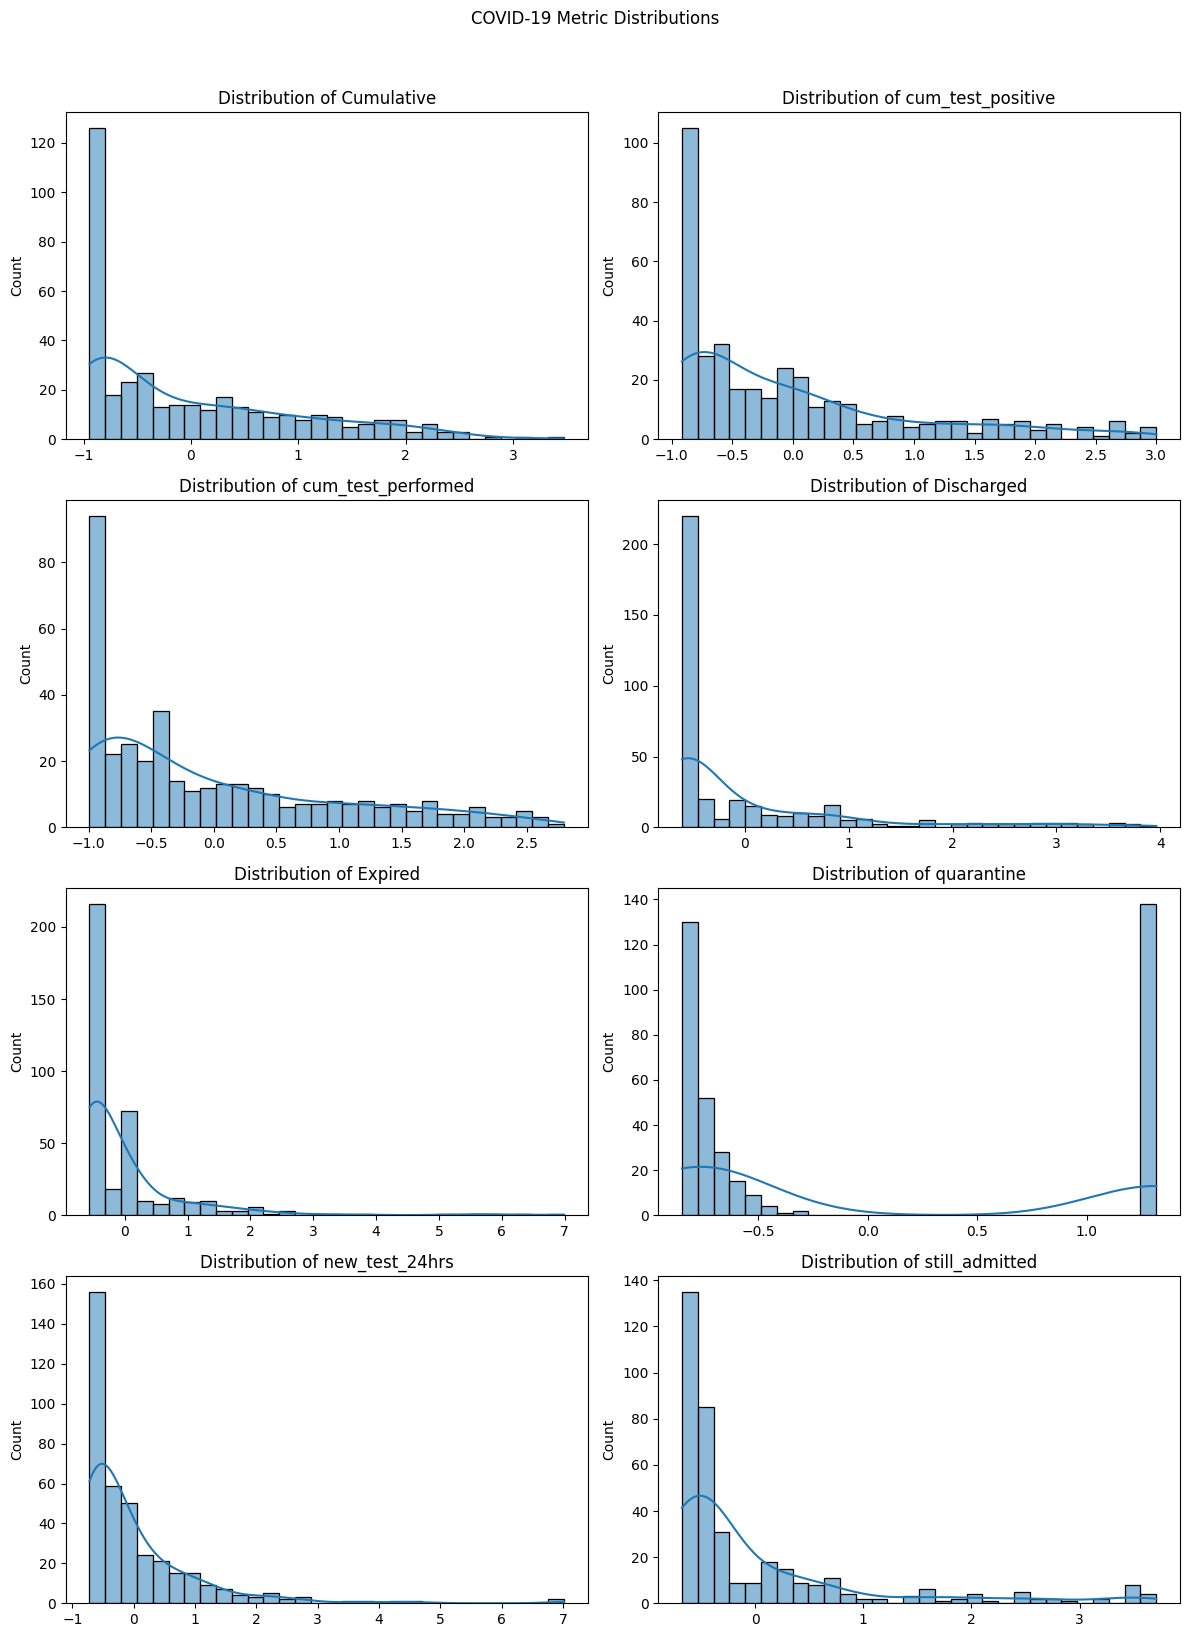

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = [
    "Cumulative",
    "cum_test_positive",
    "cum_test_performed",
    "Discharged",
    "Expired",
    "quarantine",
    "new_test_24hrs",
    "still_admitted",
]

# Create figure with subplots (adjust nrows for 8 variables)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))  # Changed to 4x2 grid
fig.suptitle("COVID-19 Metric Distributions", y=1.02)

# Plot each variable - FIXED: using 'col' instead of 'cols'
for ax, col in zip(axes.flatten(), num_cols):
    sns.histplot(data=df1, x=col, kde=True, ax=ax, bins=30)
    ax.set_title(f"Distribution of {col}")  # Fixed here too
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

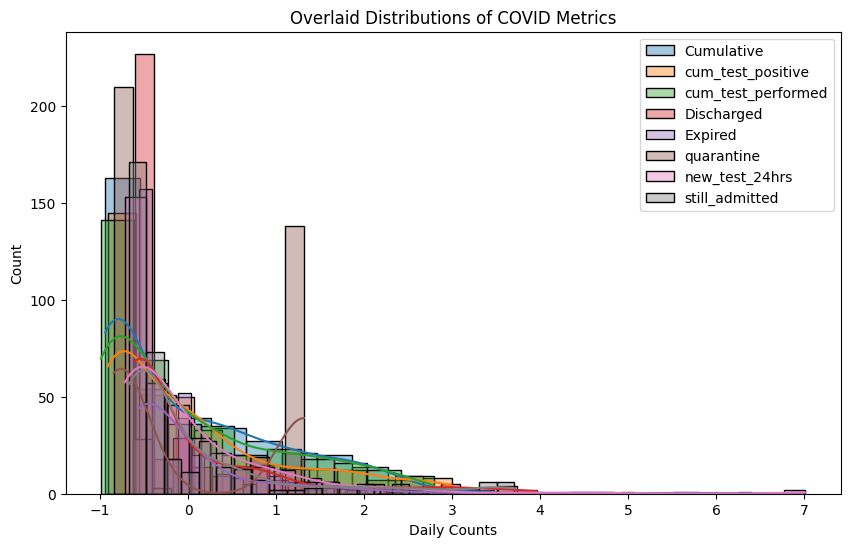

In [70]:
# overlaid distribution

plt.figure(figsize=(10, 6))
for col in [
    "Cumulative",
    "cum_test_positive",
    "cum_test_performed",
    "Discharged",
    "Expired",
    "quarantine",
    "new_test_24hrs",
    "still_admitted",
]:  # Your selected columns
    sns.histplot(data=df1, x=col, kde=True, alpha=0.4, label=col)

plt.title("Overlaid Distributions of COVID Metrics")
plt.xlabel("Daily Counts")
plt.legend()
plt.show()

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Region', ylabel='cum_test_positive'>

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


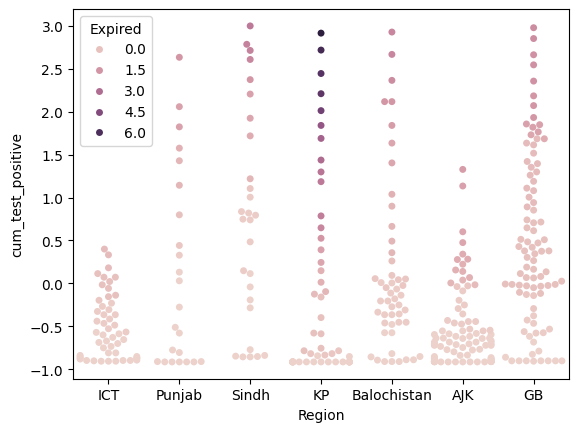

In [71]:
sns.swarmplot(x="Region", y="cum_test_positive", hue="Expired", data=df1)

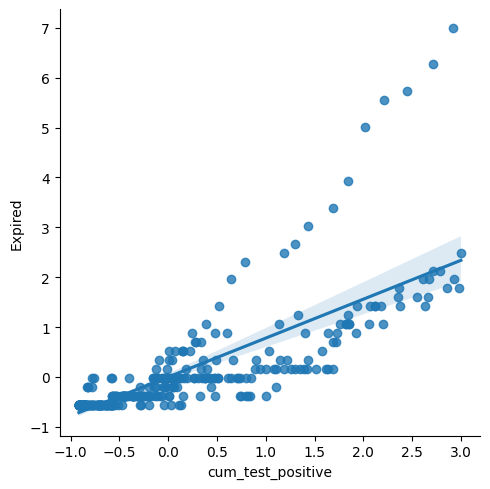

In [72]:
# lets make a linear plot

sns.lmplot(data=df1, y="Expired", x="cum_test_positive")

# Linear Regression Machine Learning Model

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df_linear_model = df1[["cum_test_positive", "Expired"]]

# Simple linear regression

x = df1[["cum_test_positive"]]
y = df1[["Expired"]]

# model building
model = LinearRegression()

# train model
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=45
)
model.fit(x, y)

# predicting model
pred = model.predict(x_test)

print(pred)

[[-0.54682421]
 [ 1.1069289 ]
 [ 0.66483649]
 [ 0.36683345]
 [ 1.11347842]
 [ 1.50644945]
 [ 0.89079483]
 [ 0.08847897]
 [ 1.42130573]
 [-0.7138369 ]
 [-0.24227165]
 [-0.34378917]
 [-0.71056214]
 [ 1.0119609 ]
 [-0.7138369 ]
 [-0.21279883]
 [-0.66471552]
 [-0.28484352]
 [-0.7138369 ]
 [ 0.21619455]
 [ 1.65053883]
 [-0.70401262]
 [-0.66471552]
 [-0.07525896]
 [-0.7138369 ]
 [ 2.28256725]
 [-0.12110559]
 [ 1.05453276]
 [ 0.61898986]
 [ 0.05573138]
 [-0.50097759]
 [-0.68108931]
 [-0.10145703]
 [-0.7138369 ]
 [-0.66799028]
 [ 1.44095428]
 [ 0.69430931]
 [-0.48132903]
 [ 2.07953221]
 [-0.7138369 ]
 [ 0.101578  ]
 [ 2.22362159]
 [-0.2226231 ]
 [ 0.37665773]
 [-0.42565814]
 [ 0.98248807]
 [-0.51080186]
 [-0.61231938]
 [ 1.2575678 ]
 [-0.10800655]
 [ 0.84167345]
 [ 0.29478876]
 [ 0.61244035]
 [-0.66471552]
 [-0.50097759]
 [-0.63851745]
 [ 0.05245662]
 [-0.09163276]
 [-0.7138369 ]
 [ 1.31651345]
 [ 1.31323869]
 [-0.01303855]
 [-0.7138369 ]
 [ 0.7827278 ]
 [ 0.1408751 ]
 [ 1.65053883]
 [-0.69746

<Axes: >

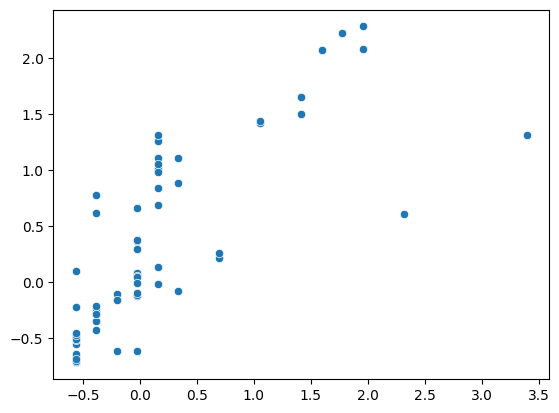

In [74]:
sns.scatterplot(x=y_test.values.flatten(), y=pred.flatten())

In [75]:
model.score(x_test, y_test)  # suggesting the model is only 57 % accurate

0.5780513672370067

In [76]:
# Lets use other methods to check the model

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    root_mean_squared_error,
)

MAE = mean_absolute_error(y_true=y_test, y_pred=pred)
MSE = mean_squared_error(y_true=y_test, y_pred=pred)
R2 = r2_score(y_true=y_test, y_pred=pred)
RMSE = root_mean_squared_error(y_true=y_test, y_pred=pred)

print("MAE:", MAE)
print("MSE:", MSE)
print("R2:", R2)
print("RMSE:", RMSE)

MAE: 0.34739778882986316
MSE: 0.2752525676872592
R2: 0.5780513672370067
RMSE: 0.5246451826589654


# Multiple Linear Regression Model

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379 entries, 0 to 636
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cumulative          379 non-null    float64
 1   cum_test_positive   379 non-null    float64
 2   cum_test_performed  379 non-null    float64
 3   Date                379 non-null    object 
 4   Discharged          379 non-null    float64
 5   Expired             379 non-null    float64
 6   quarantine          379 non-null    float64
 7   new_test_24hrs      379 non-null    float64
 8   Region              379 non-null    object 
 9   still_admitted      379 non-null    float64
 10  test_24hrs          379 non-null    object 
dtypes: float64(8), object(3)
memory usage: 35.5+ KB


In [78]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [79]:
multi_covid = df1[
    [
        "cum_test_positive",
        "cum_test_performed",
        "still_admitted",
        "Expired",
        "Discharged",
    ]
]

In [80]:
a = multi_covid[
    ["cum_test_positive", "cum_test_performed", "still_admitted", "Discharged"]
]
b = multi_covid["Expired"]

In [81]:
# select the model
model = LinearRegression()

# train model
a_train, a_test, b_train, b_test = train_test_split(
    a, b, test_size=0.2, random_state=45
)
model.fit(a, b)

# predicting model
pred = model.predict(a_test)
# Fit the multiple linear regression model
model.fit(a, b)

# run the model
pred1 = model.predict(a_test)

In [82]:
model.score(a_test, b_test)

0.5665003784150827

In [83]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    root_mean_squared_error,
)

MAE = mean_absolute_error(y_true=b_test, y_pred=pred1)
MSE = mean_squared_error(y_true=b_test, y_pred=pred1)
R2 = r2_score(y_true=b_test, y_pred=pred1)
RMSE = root_mean_squared_error(y_true=b_test, y_pred=pred1)

print("MAE:", MAE)
print("MSE:", MSE)
print("R2:", R2)
print("RMSE:", RMSE)

MAE: 0.3553086983308408
MSE: 0.28278770131653985
R2: 0.5665003784150827
RMSE: 0.5317778683967017


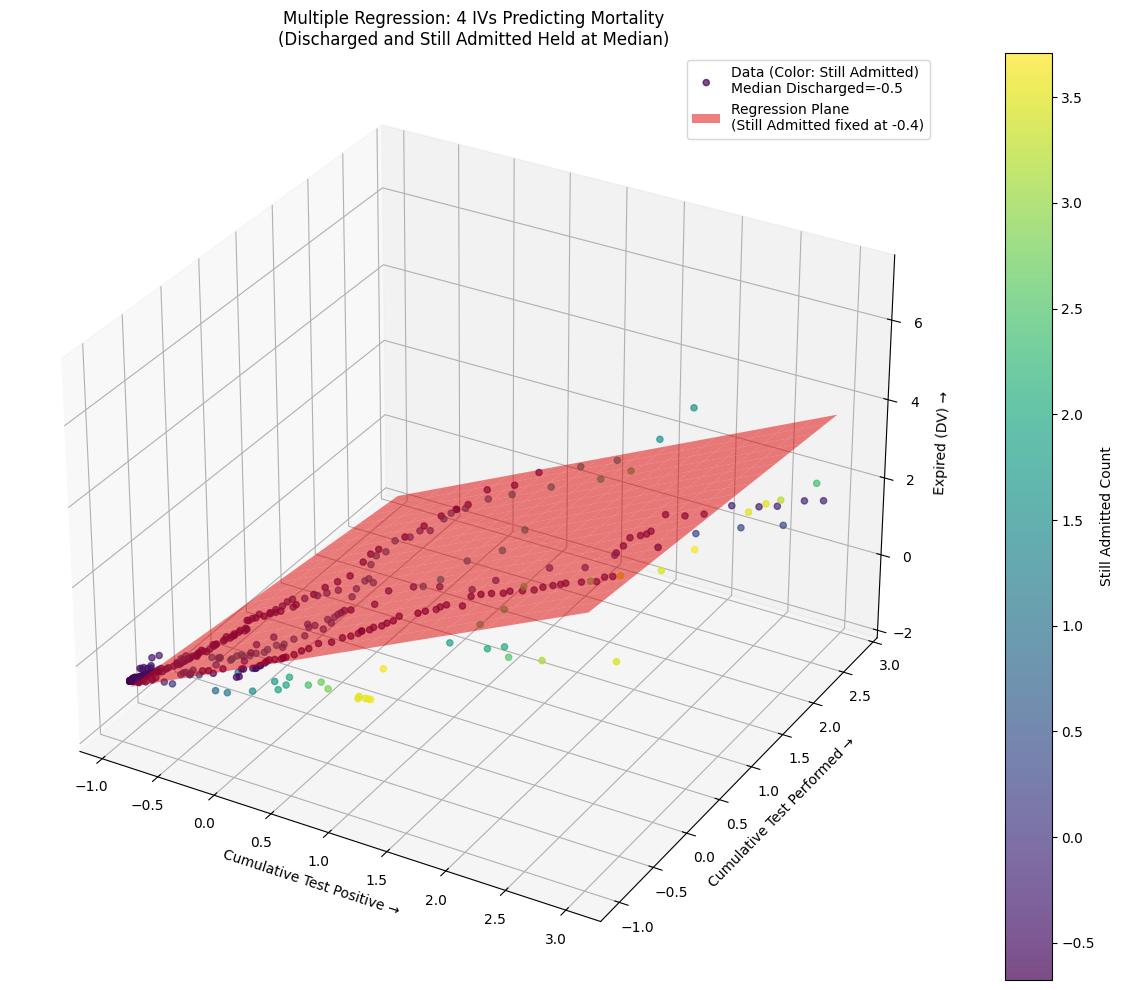

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Prepare data
X = multi_covid[
    ["cum_test_positive", "cum_test_performed", "Discharged", "still_admitted"]
]
y = multi_covid["Expired"]

# Fit model
model = LinearRegression().fit(X, y)

# Create 3D grid for first 3 IVs
x1_grid, x2_grid = np.meshgrid(
    np.linspace(X["cum_test_positive"].min(), X["cum_test_positive"].max(), 20),
    np.linspace(X["cum_test_performed"].min(), X["cum_test_performed"].max(), 20),
)

# Predict using median of 4th IV (still_admitted)
x3_fixed = X["still_admitted"].median()
X_pred = pd.DataFrame(
    {
        "cum_test_positive": x1_grid.ravel(),
        "cum_test_performed": x2_grid.ravel(),
        "Discharged": X["Discharged"].median(),  # Hold constant
        "still_admitted": x3_fixed,
    }
)
z_pred = model.predict(X_pred).reshape(x1_grid.shape)

# Plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection="3d")

# Scatter points (color = still_admitted)
sc = ax.scatter(
    X["cum_test_positive"],
    X["cum_test_performed"],
    y,
    c=X["still_admitted"],
    cmap="viridis",
    alpha=0.7,
    label=f'Data (Color: Still Admitted)\nMedian Discharged={X["Discharged"].median():.1f}',
)

# Regression plane
ax.plot_surface(
    x1_grid,
    x2_grid,
    z_pred,
    alpha=0.5,
    color="red",
    label=f"Regression Plane\n(Still Admitted fixed at {x3_fixed:.1f})",
)

ax.set_xlabel("Cumulative Test Positive →")
ax.set_ylabel("Cumulative Test Performed →")
ax.set_zlabel("Expired (DV) →")
ax.set_title(
    "Multiple Regression: 4 IVs Predicting Mortality\n(Discharged and Still Admitted Held at Median)"
)
plt.colorbar(sc, label="Still Admitted Count")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

# Classifiers

In [85]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Decision Tree Classifier


In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379 entries, 0 to 636
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cumulative          379 non-null    float64
 1   cum_test_positive   379 non-null    float64
 2   cum_test_performed  379 non-null    float64
 3   Date                379 non-null    object 
 4   Discharged          379 non-null    float64
 5   Expired             379 non-null    float64
 6   quarantine          379 non-null    float64
 7   new_test_24hrs      379 non-null    float64
 8   Region              379 non-null    object 
 9   still_admitted      379 non-null    float64
 10  test_24hrs          379 non-null    object 
dtypes: float64(8), object(3)
memory usage: 35.5+ KB


In [87]:
from sklearn.preprocessing import LabelEncoder

# Sample data
cities = ["ICT", "Punjab", "Sindh", "KP", "Balochistan", "AJK", "GB"]

# Initialize encoder
le = LabelEncoder()
encoded = le.fit_transform(cities)

# Create mapping dictionary
city_mapping = dict(zip(cities, encoded))
print("Label Encoding Mapping:")
print(city_mapping)

Label Encoding Mapping:
{'ICT': 3, 'Punjab': 5, 'Sindh': 6, 'KP': 4, 'Balochistan': 1, 'AJK': 0, 'GB': 2}


In [88]:
x = df1[
    [
        "cum_test_positive",
        "cum_test_performed",
        "Discharged",
        "quarantine",
        "Expired",
        "still_admitted",
    ]
]
y = df1["Region"]

In [89]:
# model selection

model = DecisionTreeClassifier()

# train model
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
model.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)

# accuracy
print("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.8947368421052632


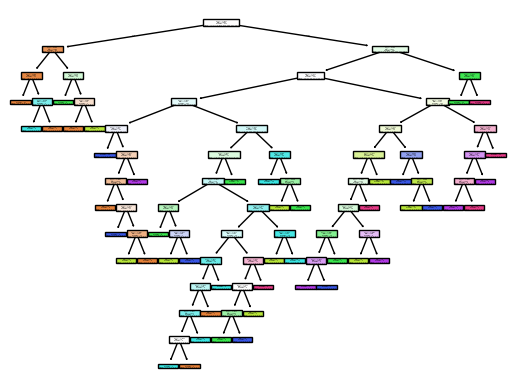

<Figure size 640x480 with 0 Axes>

In [90]:
# decision tree plotting

tree.plot_tree(model.fit(x, y), filled=True)
plt.show()
plt.savefig("tree.png")

In [91]:
from sklearn.metrics import precision_score, recall_score, f1_score

# For multiclass problems, specify averaging method
precision = precision_score(y_test, y_pred, average="weighted")  # or 'macro', 'micro'
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Precision (weighted): {precision:.3f}")
print(f"Recall (weighted): {recall:.3f}")
print(f"F1-Score (weighted): {f1:.3f}")

Precision (weighted): 0.902
Recall (weighted): 0.895
F1-Score (weighted): 0.895


In [92]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.crosstab(y_test, y_pred)
print(confusion_matrix)

col_0        AJK  Balochistan  GB  ICT  KP  Punjab  Sindh
Region                                                   
AJK           17            0   0    0   1       0      0
Balochistan    0            9   1    0   0       0      0
GB             0            1  17    0   0       0      0
ICT            2            0   0    8   0       0      0
KP             0            0   1    0   8       0      0
Punjab         0            1   0    0   0       6      0
Sindh          0            0   1    0   0       0      3


<Axes: xlabel='col_0', ylabel='Region'>

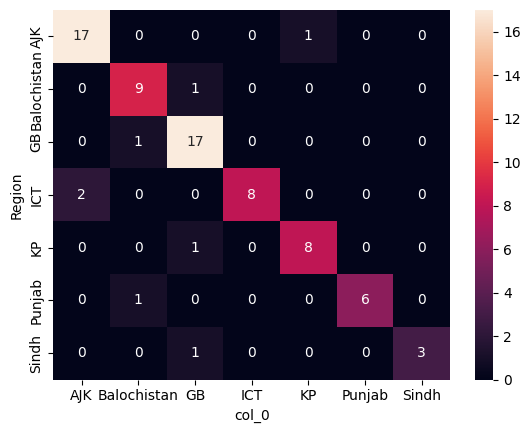

In [93]:
sns.heatmap(confusion_matrix, annot=True, fmt="d")

# To save time and effort lets evaluate the values together

In [94]:
x = df1[
    [
        "cum_test_positive",
        "cum_test_performed",
        "Discharged",
        "quarantine",
        "Expired",
        "still_admitted",
    ]
]
y = df1["Region"]

# train model
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
model.fit(x_train, y_train)

# models evaluation
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    GaussianNB(),
    SVC(),
    KNeighborsClassifier(),
]
model_names = [
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "LogisticRegression",
    "GaussianNB",
    "SVC",
    "KNeighborsClassifier",
]

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

models_scores = []
for model, model_name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Multiclass evaluation metrics
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1": f1_score(y_test, y_pred, average="weighted"),
    }
    models_scores.append([model_name, metrics])

# Print results
for model in sorted(models_scores, key=lambda x: x[1]["Accuracy"], reverse=True):
    print(f"{model[0]}:")
    print(f"  Accuracy: {model[1]['Accuracy']:.3f}")
    print(f"  Precision: {model[1]['Precision']:.3f}")
    print(f"  Recall: {model[1]['Recall']:.3f}")
    print(f"  F1: {model[1]['F1']:.3f}")
    print()

RandomForestClassifier:
  Accuracy: 0.934
  Precision: 0.940
  Recall: 0.934
  F1: 0.930

DecisionTreeClassifier:
  Accuracy: 0.921
  Precision: 0.922
  Recall: 0.921
  F1: 0.921

KNeighborsClassifier:
  Accuracy: 0.789
  Precision: 0.843
  Recall: 0.789
  F1: 0.779

SVC:
  Accuracy: 0.566
  Precision: 0.660
  Recall: 0.566
  F1: 0.559

LogisticRegression:
  Accuracy: 0.539
  Precision: 0.610
  Recall: 0.539
  F1: 0.515

GaussianNB:
  Accuracy: 0.408
  Precision: 0.542
  Recall: 0.408
  F1: 0.403



C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# The highest scores are on Random Forest Classifier so we will go with that for further hypertuning.

In [ ]:
# import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

x = df1[
    [
        "cum_test_positive",
        "cum_test_performed",
        "Discharged",
        "quarantine",
        "Expired",
        "still_admitted",
    ]
]
y = df1["Region"]


# create a model
model = RandomForestClassifier()

# define parameter grid

param_grid = {
    "n_estimators": [100, 200, 300],  # Larger forests = more stability
    "max_depth": [
        10,
        20,
        30,
        None,
    ],  # Deep enough to capture patterns, but not crazy deep
    "min_samples_split": [2, 5, 10],  # Regularization: higher = less overfitting
    "min_samples_leaf": [1, 2, 4],  # New: prevents leaves with very few samples
    "max_features": ["sqrt", "log2"],  # sqrt is usually better for classification
    "bootstrap": [True, False],  # Whether sampling with replacement
}

# object grid search cv (Creating the model)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")

# traing the model
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
grid_search.fit(x_train, y_train)

# print the best parameters
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.9143169398907105


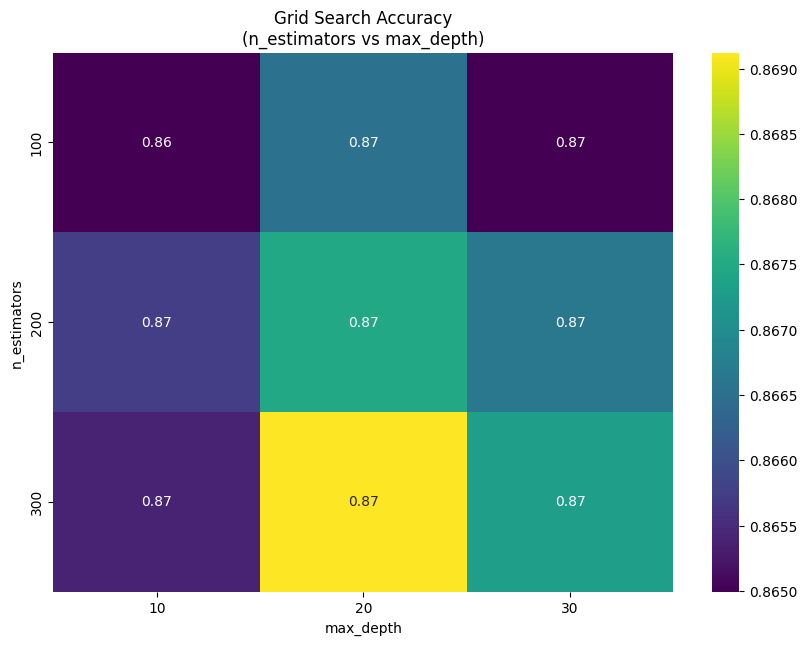

In [101]:
# collect results into a dataframe
results_df = pd.DataFrame(grid_search.cv_results_)

# Example plot: effect of n_estimators and max_depth on mean test score
pivot_table = results_df.pivot_table(
    values="mean_test_score", index="param_n_estimators", columns="param_max_depth"
)

# plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, cmap="viridis")
plt.title("Grid Search Accuracy\n(n_estimators vs max_depth)")
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_3440\3189419539.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10['params_str'] = top10['params'].apply(lambda x: str(x))
C:\Users\user\AppData\Local\Temp\ipykernel_3440\3189419539.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


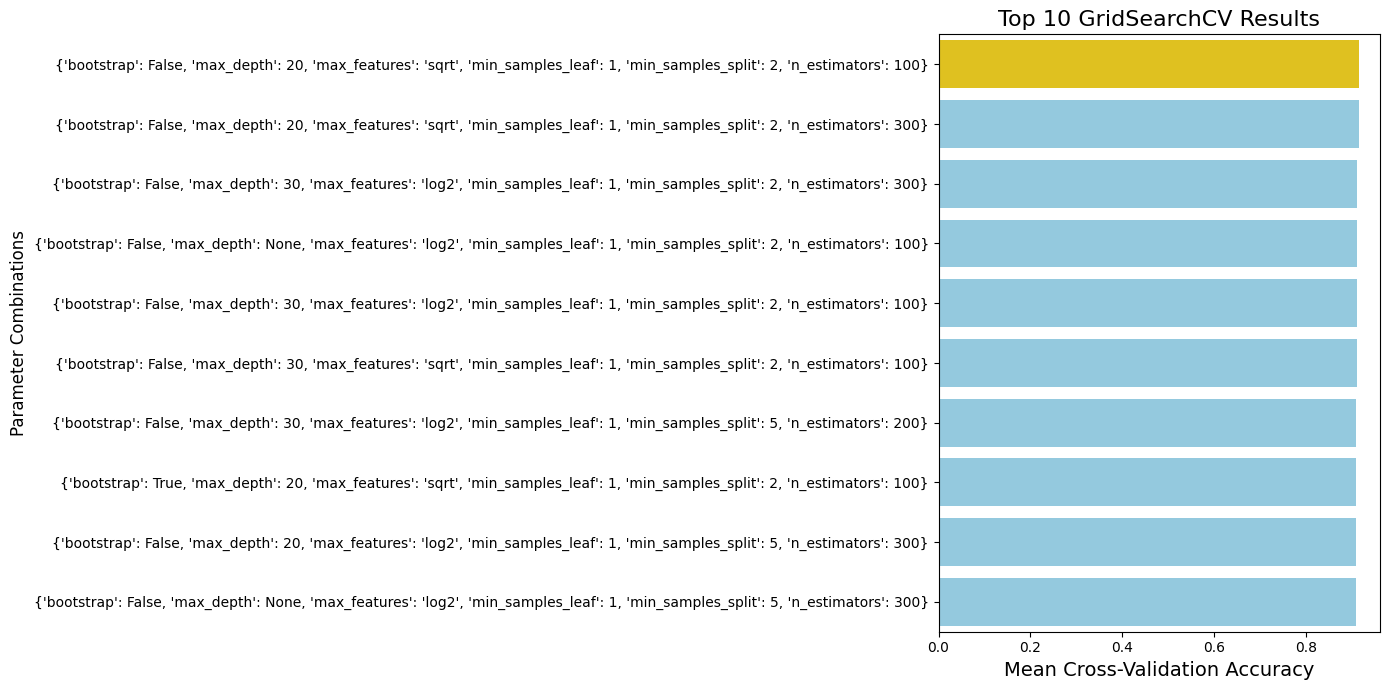

In [ ]:
# chat gpt suggested this for the best answer

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# After running GridSearch
results = pd.DataFrame(grid_search.cv_results_)

# Sort by best mean test score
results = results.sort_values(by="mean_test_score", ascending=False)

# Take top 10
top10 = results.head(10)

# Convert the 'params' column to a string
top10["params_str"] = top10["params"].apply(lambda x: str(x))

# Add color logic: gold for the best, skyblue for the others
colors = ["gold" if i == 0 else "skyblue" for i in range(len(top10))]

# Plot the graph
plt.figure(figsize=(14, 7))
sns.barplot(
    x="mean_test_score",
    y="params_str",  # Use the string representation of parameters
    data=top10,
    palette=colors,  # Apply the color scheme
)

plt.title("Top 10 GridSearchCV Results", fontsize=16)
plt.xlabel("Mean Cross-Validation Accuracy", fontsize=14)
plt.ylabel("Parameter Combinations", fontsize=12)
plt.tight_layout()
plt.show()

# K-Mean Clustring 

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


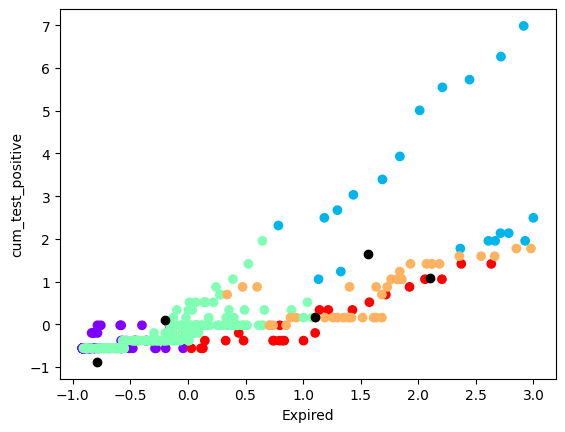

In [ ]:
# import model
from sklearn.cluster import KMeans

# Use the already normalized data directly
x = df1[
    [
        "cum_test_positive",
        "cum_test_performed",
        "Discharged",
        "quarantine",
        "Expired",
        "still_admitted",
    ]
]
y = df1["Region"]

# model the data
kmeans = KMeans(n_clusters=5)

# fit the model
kmeans.fit(x)  # No scaling, using the normalized data directly

# assign the cluster labels to the data
df1["cluster"] = kmeans.labels_

# plotting the graph
plt.scatter(df1["cum_test_positive"], df1["Expired"], c=df1["cluster"], cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="black")
# for cluster centers ie. the centroid of each cluster
plt.xlabel("Expired")
plt.ylabel("cum_test_positive")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_3440\3016630176.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


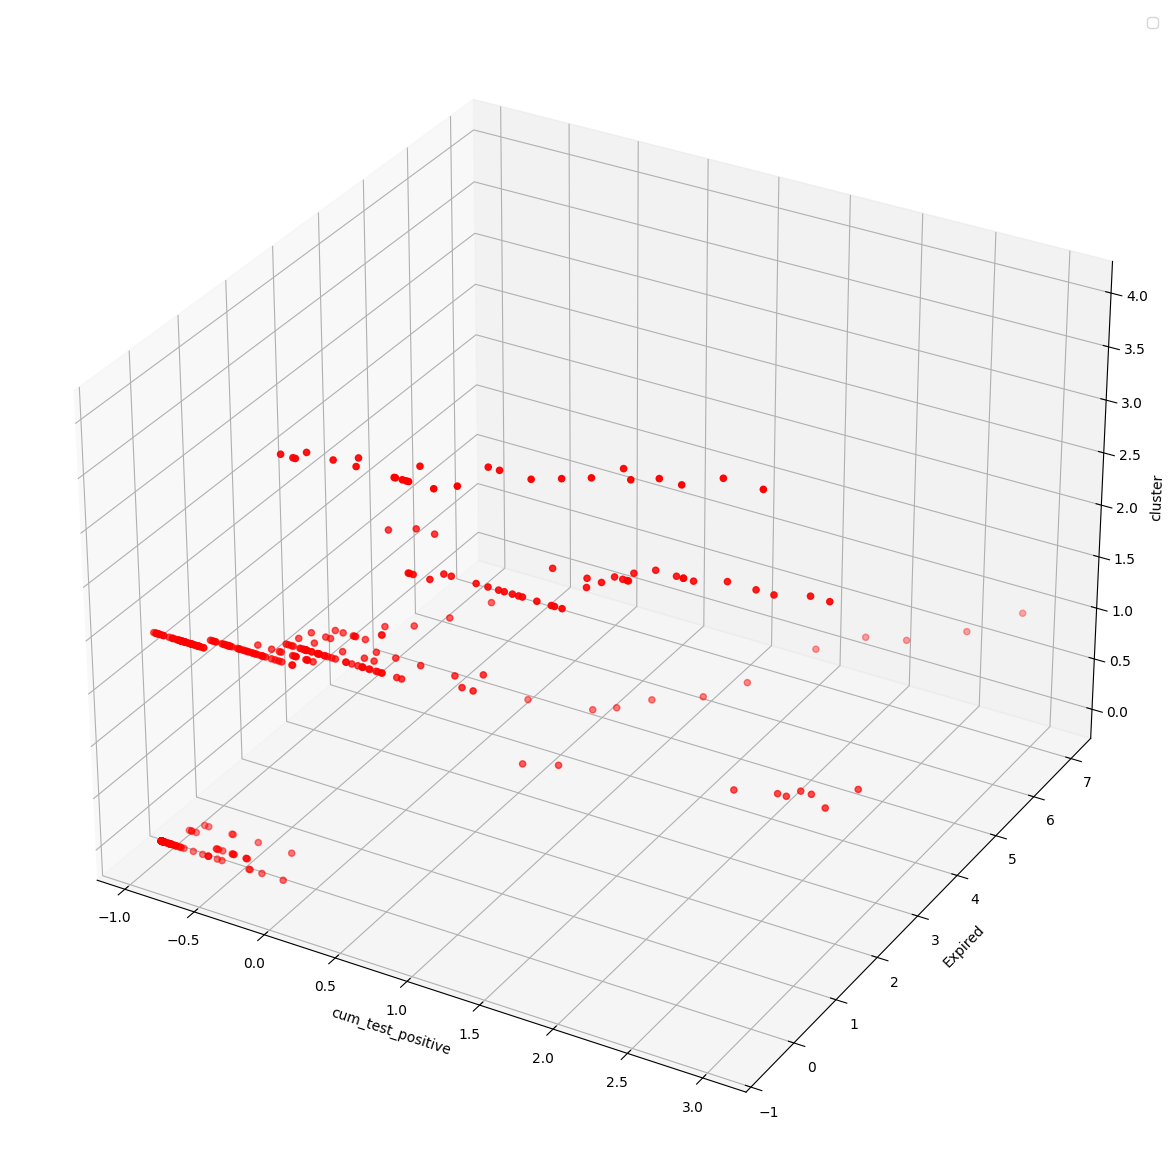

In [ ]:
# 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")

# Scatter actual values
ax.scatter(df1["cum_test_positive"], df1["Expired"], df1["cluster"], color="red")


# Labels and legend
ax.set_xlabel("cum_test_positive")
ax.set_ylabel("Expired")
ax.set_zlabel("cluster")
ax.legend()

plt.show()

In [121]:
import plotly.express as px

fig = px.scatter(df1, x="cum_test_positive", y="Expired", color="cluster")
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    df1, x="cum_test_positive", y="Expired", z="Region", color="cluster"
)
fig.show()

In [123]:
import plotly.express as px

fig = px.parallel_coordinates(
    df1,
    color="cluster",
    color_continuous_scale=px.colors.sequential.Inferno,
    title="Covid-19 Data Analysis",
)
fig.show()

In [ ]:
# saving the model

import joblib

joblib.dump(model, "covid_model.joblib")

['covid_model.joblib']